**Práctica 3. Normalización, Funciones de activación, EarlyStopping, Red Neuronal Artificial Multicapa**

Desarrolla un clasificador binario utilizando el conjunto de datos MNIST. El objetivo es diferenciar entre dígitos que son ”cincos” (clase 1) y dígitos que ”no son cincos” (clase 0).

1. Preparación de Datos:

In [1]:
from keras.datasets import mnist #Importamos la base de datos MNIST
import numpy as np

def balanced_mnist_set():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  # Se obtiene una muestra con igual número de: cincos vs no cincos

  # para el conjunto de entrenamiento
  idx_y_train_5 = np.where(y_train == 5)[0]
  idx_y_train_n5 = np.where(y_train != 5)[0]

  idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5])
  np.random.shuffle(idx_y_train)

  x_train = x_train[idx_y_train]
  y_train = y_train[idx_y_train]
  #print(x_train.shape)

  # para el conjunto de prueba(test)
  idx_y_test_5 = np.where(y_test == 5)[0]
  idx_y_test_n5 = np.where(y_test != 5)[0]
  idx_y_test_n5 = np.random.choice(idx_y_test_n5, idx_y_test_5.shape[0], replace=False)

  idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
  np.random.shuffle(idx_y_test)

  x_test = x_test[idx_y_test]
  y_test = y_test[idx_y_test]
  #print(x_test.shape)

  y_train_binary = (y_train == 5).astype(int)
  y_test_binary = (y_test == 5).astype(int)
  return (x_train, y_train_binary), (x_test, y_test_binary)

Implementar una red neuronal multicapa y entrenar el Modelo

In [2]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,\
accuracy_score, precision_score, recall_score,f1_score

(x_train, y_train_binary), (x_test, y_test_binary) = balanced_mnist_set()

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1)
])

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)

# Entrenar el modelo con Early Stopping
history = model.fit(x_train, y_train_binary, epochs=4, verbose=0,
                    batch_size=2000, validation_split=0.9, callbacks=[early_stopping])

loss_train = history.history['loss']
loss_val = history.history['val_loss']
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1, len(loss_train) + 1)


11490434/11490434 [==============================] - 0s 0us/step


Evaluación del modelo

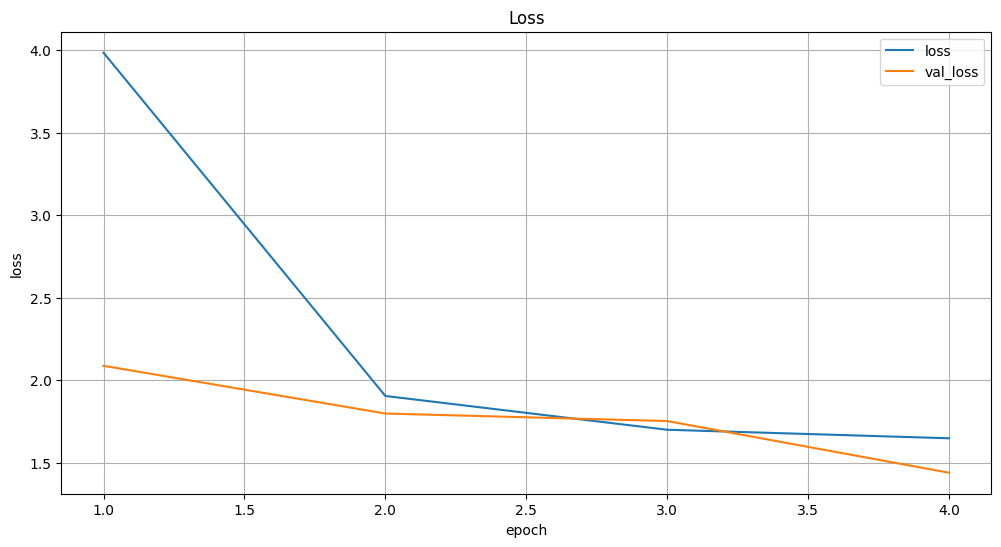

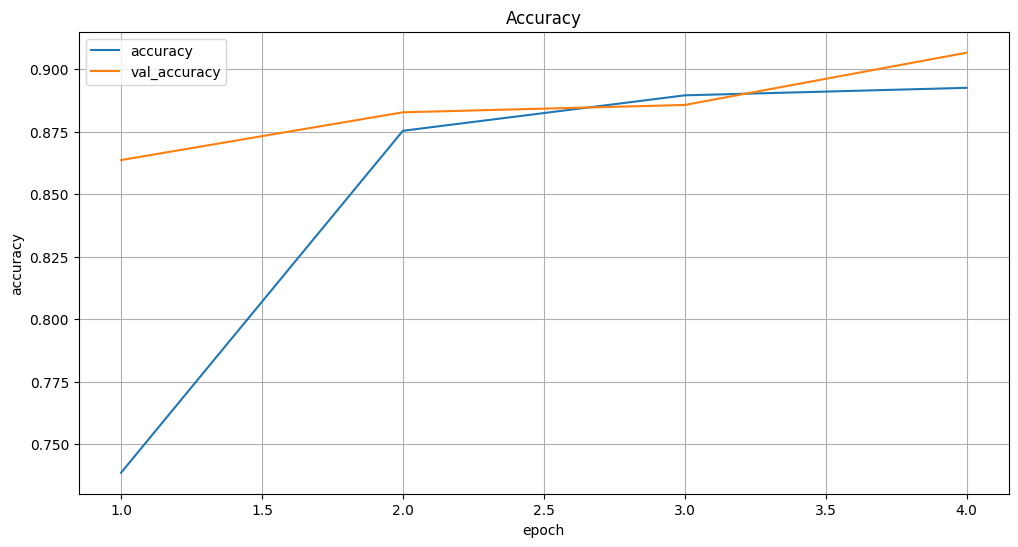

In [3]:
# Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_train, label='loss')
plt.plot(epochs, loss_val, label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy_train, label='accuracy')
plt.plot(epochs, accuracy_val, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

56/56 [==============================] - 0s 2ms/step


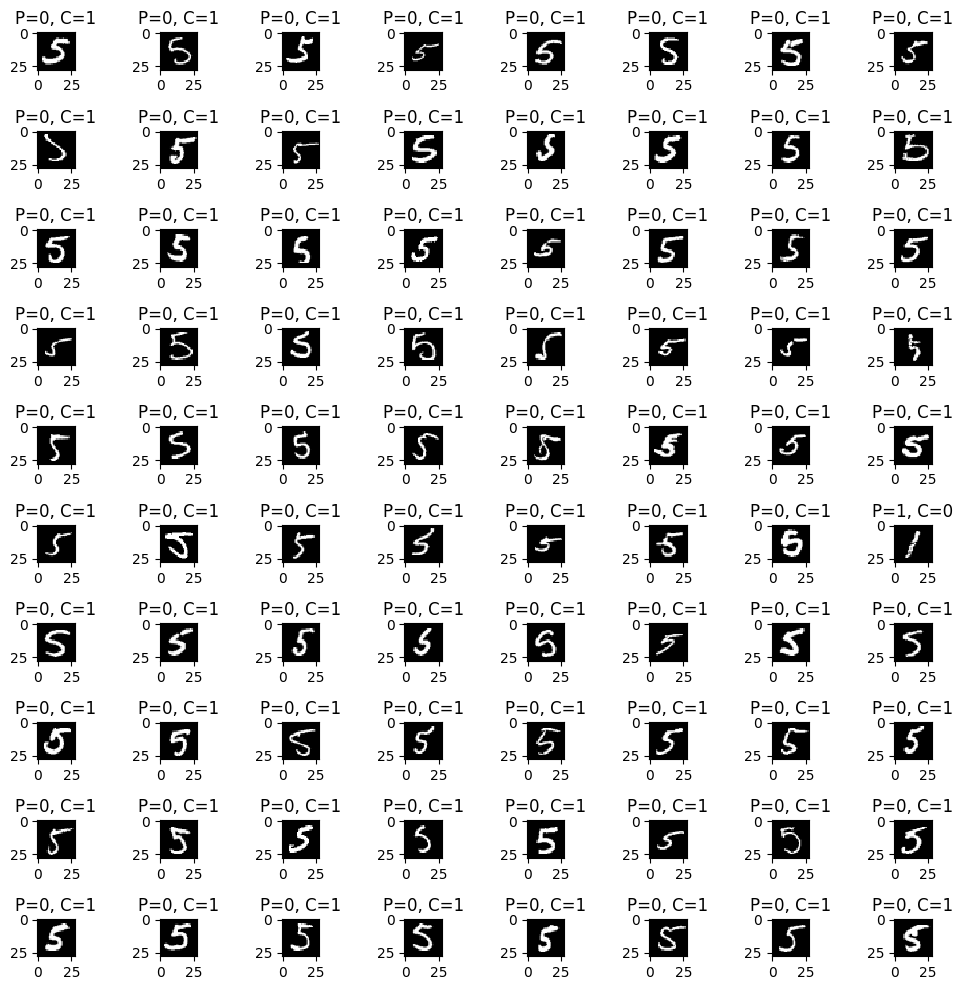

In [4]:
# Evaluar el modelo en el conjunto de prueba
y_predictions = (model.predict(x_test) >= 0.5).astype(int)[:,0]
# Encontrar las muestras en las que el modelo se ha equivocado
incorrect_indices = np.where(y_predictions.squeeze() != y_test_binary)[0]

plt.figure(figsize=(10,10))
for i, incorrect in enumerate(np.random.choice(incorrect_indices, 80, False)):
    plt.subplot(10,8,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("P={}, C={}".format(y_predictions[incorrect], y_test_binary[incorrect]))
    plt.tick_params(axis='both',which='both',bottom='off',left='off',labelbottom='off',labelleft='off')
plt.tight_layout()
plt.show()

In [5]:
#Accuracy, Precision, Recall(sensibilidad) y F1-score para la clase 1:
accuracy = accuracy_score(y_test_binary, y_predictions)
print("Accuracy:", accuracy)
precision = precision_score(y_test_binary, y_predictions)
print("Precision_1:", precision)
recall = recall_score(y_test_binary, y_predictions)
print("Recall_1:", recall)
f1_s = f1_score(y_test_binary, y_predictions)
print("F1-score_1:", f1_s)


Accuracy: 0.49887892376681614
Precision_1: 0.4166666666666667
Recall_1: 0.005605381165919282
F1-score_1: 0.011061946902654867


In [6]:
#Accuracy, Precision, Recall(sensibilidad) y F1-score para la clase 0:
accuracy = accuracy_score(y_test_binary, y_predictions)
print("Accuracy:", accuracy)
precision_0 = precision_score(y_test_binary, y_predictions, pos_label=0)
print("Precision_0:", precision_0)
recall_0 = recall_score(y_test_binary, y_predictions, pos_label=0)
print("Recall_0:", recall_0)
f1_s_0 = f1_score(y_test_binary, y_predictions, pos_label=0)
print("F1-score_0:", f1_s_0)

Accuracy: 0.49887892376681614
Precision_0: 0.4994356659142212
Recall_0: 0.992152466367713
F1-score_0: 0.6644144144144144
